In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import pickle
import os
from rdflib import Graph
import rdflib as rdf
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

c:\Users\luisa\anaconda3\envs\aifb\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def read_all_pickle_without_ending(path):
    """
    Read all pickle files in a directory and return a list of the dataframes.
    """
    files = os.listdir(path)
    files = [file for file in files if file.endswith(".pkl")]
    files.sort()
    dfs = []
    for file in files:
        dfs.append(pd.read_pickle(path + file))
    return dfs

def readallcsvinpath(path):
    """
    Read all csv files in a directory and return a list of the dataframes.
    """
    fil = os.listdir(path)
    fil = [file for file in fil if file.endswith(".csv")]
    fil.sort()
    dfs = []
    for file in fil:
        dfs.append(pd.read_csv(path + file))
    return dfs
def get_nameincolfor_index(df,id_list):
    """
    # df: dataframe
    # id_list: list of ids
    # return: list of names of ids
    """
    name_list=[]
    for i in id_list:
        name_list.append(df[df.index==i][0].values[0])
    return name_list
def cut_string(list):
    for i in range(len(list)):
        list[i] = list[i].split('mov')[1]
    return list

In [4]:
graph = rdf.Graph()
graph.parse('data/IMDB/imdb_graph.nt', format='nt')

<Graph identifier=N7b0e9c33b8f24ef7b39d0e1985f5a438 (<class 'rdflib.graph.Graph'>)>

In [146]:
files = read_all_pickle_without_ending('out/IMDB/RGAT_no_emb/')
csv = readallcsvinpath('out/IMDB/RGAT_no_emb/')
ids = [1199,2613,2048,1469]
data = torch.load('out/IMDB/RGAT_no_emb/pred_before.pt')
test_file = pd.read_csv('data/IMDB/test_Set_new.csv', sep=',')
nodes = pd.DataFrame(files[1]) 
movies = pd.read_csv('data/IMDB/tog.csv', sep=',')
gen = movies[['Drama', 'Comedy', 'Romance', 'Thriller']]
new = gen.dot(gen.columns)
movies['genres'] = new
movies[['actor','actress','director']] = movies[['actor','actress','director']].astype(int)
job = movies[['actor','actress','director']]
movies['job'] = job.dot(job.columns)
movies

,nconst,actor,primaryName,actress,knownForTitles,director,tconst,titleType,originalTitle,startYear,Drama,Comedy,Romance,Thriller,genres,job
0,nm0007562,1,Imad Ab on Khaled,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
1,nm0196878,1,Emad Daher,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
2,nm0251614,1,Husein Abu Eid,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
3,nm0259524,1,Hans Erlandsson,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
4,nm0323487,1,Ibrahim Gneim,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,nm9324389,1,Gunnel Holzhausen,0,tt0002514,0,tt0002514,movie,De svarta maskerna,1912,1,0,0,0,Drama,actor
3088,nm9507151,0,Frl. Stoike,1,tt0001914,0,tt0001914,movie,Die Sünden der Väter,1913,1,0,0,0,Drama,actress
3089,nm9843327,1,N. Moroz,0,tt0083794,0,tt0083794,movie,Davay pozhenimsya,1982,0,0,1,0,Romance,actor
3090,nm9843328,1,V. Kalashnikov,0,tt0083794,0,tt0083794,movie,Davay pozhenimsya,1982,0,0,1,0,Romance,actor


In [147]:
test = get_nameincolfor_index(nodes,ids)
res = cut_string(test)
overview = movies[movies.knownForTitles.isin(res)][['primaryName','originalTitle','startYear','genres','job', 'knownForTitles','nconst']]
dicto = {res[i]: ids[i] for i in range(len(res))}
overview['id'] = overview.knownForTitles.map(dicto)
test_idx = nodes[nodes[0].isin(test_file.movie)]
test_pred = data[test_idx.index]
overview

,primaryName,originalTitle,startYear,genres,job,knownForTitles,nconst,id
319,Ruth Allen,Down to Earth,1917,Comedy,actress,tt0007873,nm0021020,1469
320,William H. Keith,Down to Earth,1917,Comedy,actor,tt0007873,nm0445318,1469
2028,Charles Logan,Journey Into Fear,1975,Thriller,actor,tt0073213,nm0517526,2048
2030,John Loughney,Beyond the Time Barrier,1960,Romance,actor,tt0053651,nm0521774,2613
2031,Tom Ravick,Beyond the Time Barrier,1960,Romance,actor,tt0053651,nm0712447,2613
2032,Malcolm Thompson,Beyond the Time Barrier,1960,Romance,actor,tt0053651,nm3911635,2613
2186,Jose Portullano,Um Chá nas Nuvens,1917,Comedy,actor,tt0007794,nm0692545,1199
2187,Miguel Portullano,Um Chá nas Nuvens,1917,Comedy,actor,tt0007794,nm0692546,1199


In [148]:
labels = test_file['genre'].astype('category').cat.codes 
test_file['label'] = labels.values
test_file['pred_label'] =test_pred.argmax(dim=-1).tolist()
test_file

,movie,id,genre,label,pred_label
0,http://imdb.org/movtt0004902,175,http://imdb.org/genDrama,1,2
1,http://imdb.org/movtt0093897,702,http://imdb.org/genThriller,3,3
2,http://imdb.org/movtt0009482,390,http://imdb.org/genComedy,0,3
3,http://imdb.org/movtt0040801,452,http://imdb.org/genThriller,3,1
4,http://imdb.org/movtt0004470,131,http://imdb.org/genDrama,1,3
5,http://imdb.org/movtt0004956,186,http://imdb.org/genDrama,1,3
6,http://imdb.org/movtt0107186,823,http://imdb.org/genRomance,2,0
7,http://imdb.org/movtt0004363,121,http://imdb.org/genComedy,0,3
8,http://imdb.org/movtt0099380,741,http://imdb.org/genThriller,3,0
9,http://imdb.org/movtt0003772,68,http://imdb.org/genDrama,1,0


In [149]:
topmax = csv[1].sort_values(by=['max_nodes'], ascending=False)
topmax.head()

,Unnamed: 0,Unnamed: 1,tensor_nodes,max_nodes,pos_max_nodes,min_nodes,pos_min_nodes
33,33,"tensor(1469, device='cuda:7')","tensor(indices=tensor([[ 650, 1127, 1469, 2761...",1.044495,1127,-1.006582,1469
13,13,"tensor(1199, device='cuda:7')","tensor(indices=tensor([[ 650, 769, 1199, 1470...",0.906776,2761,-0.661224,1199
32,32,"tensor(2048, device='cuda:7')","tensor(indices=tensor([[ 927, 1769, 2048, 2721...",0.862930,1769,-0.076685,2048
27,27,"tensor(2079, device='cuda:7')","tensor(indices=tensor([[ 277, 408, 2079, 2684...",0.818762,277,-0.013352,2079
6,6,"tensor(2178, device='cuda:7')","tensor(indices=tensor([[ 680, 880, 1819, 2178...",0.809685,880,-0.041777,2178


In [150]:
#RGAT max
genres_dict = {'0': 'Comedy', '1': 'Drama', '2': 'Romance', '3': 'Thriller'}
for i in topmax[:10].index:
    node_id = topmax['Unnamed: 1'][i].split(',')[0].split('(')[1]
    max_node = topmax.max_nodes[i]
    pos_max_node = topmax.pos_max_nodes[i]
    pred_node_info = overview[overview['id']== int(node_id)]
    uri_pred = nodes[nodes.index == int(node_id)][0].values[0]
    uri_best = nodes[nodes.index == int(pos_max_node)][0].values[0]
    print(uri_pred)
    try:
        job = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['job'].values[0]
        name_best = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['primaryName'].values[0]
    except:
        print('uri_best')
        name_best = movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'].values[0]
        job = 'Year'
        #print('nam:',name_best, movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'] )
    
    mov_title = movies[movies.knownForTitles == uri_pred.split('mov')[1]]['originalTitle'].values[0]
    print('+++++++ STARTING WITH NODE ', mov_title, '+++++++++++++')
    pred_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['pred_label'].values[0])]
    real_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['label'].values[0])]
    print('The movie ', mov_title, 'has the predicted genre ', pred_genre, 'and the real genre ', real_genre, 'because of node ',job, name_best,'.')

    for s, p, o in graph:
        if s == rdf.term.URIRef(uri_pred):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o ==  rdf.term.URIRef(uri_pred):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
        if s ==  rdf.term.URIRef(uri_best):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o == rdf.term.URIRef(uri_best):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            elif job == 'Year':
                print(s)
                #s = 'movie ' + movies[movies.knownForTitles == ('tt' + s.split('/')[-1].split('tt')[1])]['originalTitle'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
    print('\n')

http://imdb.org/movtt0007873
+++++++ STARTING WITH NODE  Down to Earth +++++++++++++
The movie  Down to Earth has the predicted genre  Thriller and the real genre  Comedy because of node  actor William H. Keith .
The  actor William H. Keith has the following properties: collabs_with Marie Hubert Frohman
The movie  Down to Earth is the following property of: acted_in William H. Keith
The movie  Down to Earth has the following properties: published_in year1917
The  actor William H. Keith is the following property of: collabs_with Marie Hubert Frohman
The  actor William H. Keith is the following property of: preferred_by genComedy
The movie  Down to Earth has the following properties: has_actor William H. Keith


http://imdb.org/movtt0007794
+++++++ STARTING WITH NODE  Um Chá nas Nuvens +++++++++++++
The movie  Um Chá nas Nuvens has the predicted genre  Comedy and the real genre  Comedy because of node  director Marie Hubert Frohman .
The  director Marie Hubert Frohman is the following pr

In [151]:
topmin = csv[1].sort_values(by=['min_nodes'], ascending=True)
topmin.head()

,Unnamed: 0,Unnamed: 1,tensor_nodes,max_nodes,pos_max_nodes,min_nodes,pos_min_nodes
33,33,"tensor(1469, device='cuda:7')","tensor(indices=tensor([[ 650, 1127, 1469, 2761...",1.044495,1127,-1.006582,1469
13,13,"tensor(1199, device='cuda:7')","tensor(indices=tensor([[ 650, 769, 1199, 1470...",0.906776,2761,-0.661224,1199
32,32,"tensor(2048, device='cuda:7')","tensor(indices=tensor([[ 927, 1769, 2048, 2721...",0.862930,1769,-0.076685,2048
8,8,"tensor(877, device='cuda:7')","tensor(indices=tensor([[ 422, 775, 877, 2602...",0.762039,775,-0.042568,877
6,6,"tensor(2178, device='cuda:7')","tensor(indices=tensor([[ 680, 880, 1819, 2178...",0.809685,880,-0.041777,2178


In [152]:
#RGAT min 
genres_dict = {'0': 'Comedy', '1': 'Drama', '2': 'Romance', '3': 'Thriller'}
for i in topmin[:10].index:
    node_id = topmin['Unnamed: 1'][i].split(',')[0].split('(')[1]
    max_node = topmin.min_nodes[i]
    pos_max_node = topmin.pos_min_nodes[i]
    pred_node_info = overview[overview['id']== int(node_id)]
    uri_pred = nodes[nodes.index == int(node_id)][0].values[0]
    uri_best = nodes[nodes.index == int(pos_max_node)][0].values[0]
    print(uri_pred)
    try:
        job = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['job'].values[0]
        name_best = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['primaryName'].values[0]
    except:
        print('uri_best')
        name_best = movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'].values[0]
        job = 'Year'
        #print('nam:',name_best, movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'] )
    
    mov_title = movies[movies.knownForTitles == uri_pred.split('mov')[1]]['originalTitle'].values[0]
    print('+++++++ STARTING WITH NODE ', mov_title, '+++++++++++++')
    pred_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['pred_label'].values[0])]
    real_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['label'].values[0])]
    print('The movie ', mov_title, 'has the predicted genre ', pred_genre, 'and the real genre ', real_genre, 'because of node ',job, name_best,'.')

    for s, p, o in graph:
        if s == rdf.term.URIRef(uri_pred):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o ==  rdf.term.URIRef(uri_pred):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
        if s ==  rdf.term.URIRef(uri_best):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o == rdf.term.URIRef(uri_best):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            elif job == 'Year':
                print(s)
                #s = 'movie ' + movies[movies.knownForTitles == ('tt' + s.split('/')[-1].split('tt')[1])]['originalTitle'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
    print('\n')

http://imdb.org/movtt0007873
uri_best
+++++++ STARTING WITH NODE  Down to Earth +++++++++++++
The movie  Down to Earth has the predicted genre  Thriller and the real genre  Comedy because of node  Year 1917 .
The movie  Down to Earth is the following property of: acted_in William H. Keith
William H. Keith
The  Year 1917 is the following property of: acted_in William H. Keith
The movie  Down to Earth has the following properties: published_in year1917
The  Year 1917 has the following properties: published_in year1917
The movie  Down to Earth has the following properties: has_actor William H. Keith
The  Year 1917 has the following properties: has_actor William H. Keith


http://imdb.org/movtt0007794
uri_best
+++++++ STARTING WITH NODE  Um Chá nas Nuvens +++++++++++++
The movie  Um Chá nas Nuvens has the predicted genre  Comedy and the real genre  Comedy because of node  Year 1917 .
The movie  Um Chá nas Nuvens is the following property of: acted_in Miguel Portullano
Miguel Portullano
The

In [160]:
rel_tab = pd.DataFrame(files[2])
rel_tab.index

RangeIndex(start=0, stop=6, step=1)

In [156]:
top_edges = csv[0].sort_values(by=['max_edges'], ascending=False)
top_edges.head()

,Unnamed: 0,Unnamed: 1,tensor_edges,max_edges,pos_max_edges,min_edges,pos_min_edges
33,33,"tensor(1469, device='cuda:7')","tensor(indices=tensor([[ 0, 0, 0, 0...",850.333557,"tensor([[ 1, 1127]])",-1053.448120,"tensor([[ 0, 1127]])"
13,13,"tensor(1199, device='cuda:7')","tensor(indices=tensor([[ 0, 0, 0, 0...",459.914368,"tensor([[ 3, 1470]])",-431.766998,"tensor([[ 0, 1470]])"
24,24,"tensor(2613, device='cuda:7')","tensor(indices=tensor([[ 0, 0, 0, 0...",101.082947,"tensor([[ 0, 756]])",-77.333954,"tensor([[ 3, 756]])"
32,32,"tensor(2048, device='cuda:7')","tensor(indices=tensor([[ 0, 0, 0, 0...",86.094269,"tensor([[ 3, 1769]])",-128.650696,"tensor([[ 0, 1769]])"
22,22,"tensor(1356, device='cuda:7')","tensor(indices=tensor([[ 0, 0, 0, 0...",54.447197,"tensor([[ 3, 2102]])",-59.387707,"tensor([[ 1, 2102]])"


In [164]:
genres_dict = {'0': 'Comedy', '1': 'Drama', '2': 'Romance', '3': 'Thriller'}
for i in top_edges[:10].index:
    node_id = top_edges['Unnamed: 1'][i].split(',')[0].split('(')[1]
    max_edge = top_edges.max_edges[i]
    pos_max_edge = top_edges.pos_max_edges[i].split(',')[0].split(' ')[-1]
    pos_max_node = top_edges.pos_max_edges[i].split(',')[1].split(']')[0]
    print(pos_max_edge)
    relation_name = rel_tab[rel_tab.index == int(pos_max_edge)][0].values[0]
    print(relation_name)
    pred_node_info = overview[overview['id']== int(node_id)]
    uri_pred = nodes[nodes.index == int(node_id)][0].values[0]
    uri_best = nodes[nodes.index == int(pos_max_node)][0].values[0]
    print(uri_best)
    try:
        job = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['job'].values[0]
        relation = pos_max_edge
        name_best = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['primaryName'].values[0]
    except:
        
        print('uri_best')
        name_best = movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'].values[0]
        job = 'Year'
        #print('nam:',name_best, movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'] )
    
    mov_title = movies[movies.knownForTitles == uri_pred.split('mov')[1]]['originalTitle'].values[0]
    print('+++++++ STARTING WITH NODE ', mov_title, '+++++++++++++')
    pred_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['pred_label'].values[0])]
    real_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['label'].values[0])]
    relation_name = relation_name.split('/')[-1]
    print('The movie ', mov_title, 'has the predicted genre ', pred_genre, 'and the real genre ', real_genre, 'because of edge ',relation_name, name_best,'.')

    for s, p, o in graph:
        if s == rdf.term.URIRef(uri_pred):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o ==  rdf.term.URIRef(uri_pred):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
        if s ==  rdf.term.URIRef(uri_best):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o == rdf.term.URIRef(uri_best):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            elif job == 'Year':
                s = 'movie ' + movies[movies.knownForTitles == ('tt' + s.split('/')[-1].split('tt')[1])]['originalTitle'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
    print('\n')

1
http://imdb.org/ontology/has_actor
http://imdb.org/actnm0445318
+++++++ STARTING WITH NODE  Down to Earth +++++++++++++
The movie  Down to Earth has the predicted genre  Thriller and the real genre  Comedy because of edge  has_actor William H. Keith .
The  actor William H. Keith has the following properties: collabs_with Marie Hubert Frohman
The movie  Down to Earth is the following property of: acted_in William H. Keith
The movie  Down to Earth has the following properties: published_in year1917
The  actor William H. Keith is the following property of: collabs_with Marie Hubert Frohman
The  actor William H. Keith is the following property of: preferred_by genComedy
The movie  Down to Earth has the following properties: has_actor William H. Keith


3
http://imdb.org/ontology/acted_in
http://imdb.org/actnm0692546
+++++++ STARTING WITH NODE  Um Chá nas Nuvens +++++++++++++
The movie  Um Chá nas Nuvens has the predicted genre  Comedy and the real genre  Comedy because of edge  acted_in 

In [145]:
files = read_all_pickle_without_ending('out/IMDB/RGCN_no_emb/')
csv = readallcsvinpath('out/IMDB/RGCN_no_emb/')
ids = [268,1493,2032,1130,321,2060]
data = torch.load('out/IMDB/RGCN_no_emb/pred_before.pt')
test_file = pd.read_csv('data/IMDB/test_Set_new.csv', sep=',')
nodes = pd.DataFrame(files[1]) 
movies = pd.read_csv('data/IMDB/tog.csv', sep=',')
gen = movies[['Drama', 'Comedy', 'Romance', 'Thriller']]
new = gen.dot(gen.columns)
movies['genres'] = new
movies[['actor','actress','director']] = movies[['actor','actress','director']].astype(int)
job = movies[['actor','actress','director']]
movies['job'] = job.dot(job.columns)
movies

,nconst,actor,primaryName,actress,knownForTitles,director,tconst,titleType,originalTitle,startYear,Drama,Comedy,Romance,Thriller,genres,job
0,nm0007562,1,Imad Ab on Khaled,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
1,nm0196878,1,Emad Daher,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
2,nm0251614,1,Husein Abu Eid,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
3,nm0259524,1,Hans Erlandsson,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
4,nm0323487,1,Ibrahim Gneim,0,tt0098544,0,tt0098544,movie,Täcknamn Coq Rouge,1989,0,0,0,1,Thriller,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,nm9324389,1,Gunnel Holzhausen,0,tt0002514,0,tt0002514,movie,De svarta maskerna,1912,1,0,0,0,Drama,actor
3088,nm9507151,0,Frl. Stoike,1,tt0001914,0,tt0001914,movie,Die Sünden der Väter,1913,1,0,0,0,Drama,actress
3089,nm9843327,1,N. Moroz,0,tt0083794,0,tt0083794,movie,Davay pozhenimsya,1982,0,0,1,0,Romance,actor
3090,nm9843328,1,V. Kalashnikov,0,tt0083794,0,tt0083794,movie,Davay pozhenimsya,1982,0,0,1,0,Romance,actor


In [120]:
test = get_nameincolfor_index(nodes,ids)
res = cut_string(test)
overview = movies[movies.knownForTitles.isin(res)][['primaryName','originalTitle','startYear','genres','job', 'knownForTitles','nconst']]
dicto = {res[i]: ids[i] for i in range(len(res))}
overview['id'] = overview.knownForTitles.map(dicto)
test_idx = nodes[nodes[0].isin(test_file.movie)]
test_pred = data[test_idx.index]
overview

,primaryName,originalTitle,startYear,genres,job,knownForTitles,nconst,id
688,Gertrude Barrett,Without Hope,1914,Comedy,actress,tt0004828,nm0057141,321
751,Auge Becker,Peck's Bad Girl,1918,Comedy,actor,tt0009482,nm0065348,1493
752,F.G. Patton,Peck's Bad Girl,1918,Comedy,actor,tt0009482,nm0666559,1493
1815,James Hester,Mrs. Black Is Back,1914,Comedy,actor,tt0004363,nm0381677,2032
1958,Marian Kinmaird,"Alma, Where Do You Live?",1917,Comedy,actress,tt0007628,nm0455674,1130
2368,Marion Whitney,The Apaches of Paris,1915,Drama,actress,tt0004902,nm0926330,268
3005,Si-Fun Yeung,Jia ri qing wei le,1993,Romance,actress,tt0108605,nm5767799,2060


In [121]:
labels = test_file['genre'].astype('category').cat.codes 
test_file['label'] = labels.values
test_file['pred_label'] =test_pred.argmax(dim=-1).tolist()
test_file.head()

,movie,id,genre,label,pred_label
0,http://imdb.org/movtt0004902,175,http://imdb.org/genDrama,1,3
1,http://imdb.org/movtt0093897,702,http://imdb.org/genThriller,3,3
2,http://imdb.org/movtt0009482,390,http://imdb.org/genComedy,0,1
3,http://imdb.org/movtt0040801,452,http://imdb.org/genThriller,3,2
4,http://imdb.org/movtt0004470,131,http://imdb.org/genDrama,1,1


In [122]:
topmax = csv[1].sort_values(by=['max_nodes'], ascending=False)

In [123]:
#RGCNmax
genres_dict = {'0': 'Comedy', '1': 'Drama', '2': 'Romance', '3': 'Thriller'}
for i in topmax[:10].index:
    node_id = topmax['Unnamed: 1'][i].split(',')[0].split('(')[1]
    max_node = topmax.max_nodes[i]
    pos_max_node = topmax.pos_max_nodes[i]
    pred_node_info = overview[overview['id']== int(node_id)]
    uri_pred = nodes[nodes.index == int(node_id)][0].values[0]
    uri_best = nodes[nodes.index == int(pos_max_node)][0].values[0]
    print(uri_pred)
    try:
        job = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['job'].values[0]
        name_best = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['primaryName'].values[0]
    except:
        print('uri_best')
        name_best = movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'].values[0]
        job = 'Year'
        #print('nam:',name_best, movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'] )
    
    mov_title = movies[movies.knownForTitles == uri_pred.split('mov')[1]]['originalTitle'].values[0]
    print('+++++++ STARTING WITH NODE ', mov_title, '+++++++++++++')
    pred_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['pred_label'].values[0])]
    real_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['label'].values[0])]
    print('The movie ', mov_title, 'has the predicted genre ', pred_genre, 'and the real genre ', real_genre, 'because of node ',job, name_best,'.')

    for s, p, o in graph:
        if s == rdf.term.URIRef(uri_pred):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o ==  rdf.term.URIRef(uri_pred):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
        if s ==  rdf.term.URIRef(uri_best):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o == rdf.term.URIRef(uri_best):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            elif job == 'Year':
                s = 'movie ' + movies[movies.knownForTitles == ('tt' + s.split('/')[-1].split('tt')[1])]['originalTitle'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
    print('\n')

http://imdb.org/movtt0004902
uri_best
+++++++ STARTING WITH NODE  The Apaches of Paris +++++++++++++
The movie  The Apaches of Paris has the predicted genre  Thriller and the real genre  Drama because of node  Year 1915 .
The  Year 1915 is the following property of: published_in movie The Flying Twins
The  Year 1915 is the following property of: published_in movie The Face in the Moonlight
The  Year 1915 is the following property of: published_in movie The Eternal City
The  Year 1915 is the following property of: published_in movie The College Orphan
The  Year 1915 is the following property of: published_in movie Mary's Lamb
The  Year 1915 is the following property of: published_in movie The Old Homestead
The  Year 1915 is the following property of: published_in movie The Cub
The  Year 1915 is the following property of: published_in movie Colonel Carter of Cartersville
The  Year 1915 is the following property of: published_in movie Black Fear
The  Year 1915 is the following property of

In [124]:
topmin = csv[1].sort_values(by=['min_nodes'], ascending=True)

In [135]:
#RGCNmax
genres_dict = {'0': 'Comedy', '1': 'Drama', '2': 'Romance', '3': 'Thriller'}
for i in topmin[:10].index:
    node_id = topmin['Unnamed: 1'][i].split(',')[0].split('(')[1]
    max_node = topmin.max_nodes[i]
    pos_max_node = topmin.pos_max_nodes[i]
    pred_node_info = overview[overview['id']== int(node_id)]
    uri_pred = nodes[nodes.index == int(node_id)][0].values[0]
    uri_best = nodes[nodes.index == int(pos_max_node)][0].values[0]
    print(uri_pred)
    try:
        job = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['job'].values[0]
        name_best = movies[movies.nconst == ('nm' + uri_best.split('nm')[1])]['primaryName'].values[0]
    except:
        print(uri_best)
        name_best = movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'].values[0]
        job = 'Year'
        #print('nam:',name_best, movies[movies.knownForTitles == ('tt' + uri_pred.split('tt')[-1])]['startYear'] )
    
    mov_title = movies[movies.knownForTitles == uri_pred.split('mov')[1]]['originalTitle'].values[0]
    print('+++++++ STARTING WITH NODE ', mov_title, '+++++++++++++')
    pred_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['pred_label'].values[0])]
    real_genre = genres_dict[str(test_file[test_file.movie == uri_pred]['label'].values[0])]
    print('The movie ', mov_title, 'has the predicted genre ', pred_genre, 'and the real genre ', real_genre, 'because of node ',job, name_best,'.')

    for s, p, o in graph:
        if s == rdf.term.URIRef(uri_pred):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The movie ', mov_title, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o ==  rdf.term.URIRef(uri_pred):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The movie ', mov_title, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
        if s ==  rdf.term.URIRef(uri_best):
            if o.split('/')[-1].startswith('act') or o.split('/')[-1].startswith('dir'):
                o = movies[movies.nconst == ('nm' + o.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
            else:
                print('The ', job, name_best, 'has the following properties:', p.split('/')[-1], o.split('/')[-1])
        if o == rdf.term.URIRef(uri_best):
            if s.split('/')[-1].startswith('act') or s.split('/')[-1].startswith('dir'):
                s = movies[movies.nconst == ('nm' + s.split('/')[-1].split('nm')[1])]['primaryName'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            elif job == 'Year':
                s = 'movie ' + movies[movies.knownForTitles == ('tt' + s.split('/')[-1].split('tt')[1])]['originalTitle'].values[0]
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
            else:
                print('The ', job, name_best, 'is the following property of:', p.split('/')[-1], s.split('/')[-1])
    print('\n')

http://imdb.org/movtt0108605
http://imdb.org/movtt0108010
+++++++ STARTING WITH NODE  Jia ri qing wei le +++++++++++++
The movie  Jia ri qing wei le has the predicted genre  Drama and the real genre  Romance because of node  Year 1993 .
The  Year 1993 has the following properties: has_actor Alexander Zshabin
The  Year 1993 has the following properties: published_in year1993
The  Year 1993 is the following property of: acted_in Aleksandr Gostev
The  Year 1993 has the following properties: has_actor Aleksandr Gostev
The movie  Jia ri qing wei le has the following properties: published_in year1993
The  Year 1993 is the following property of: acted_in Alexander Zshabin


http://imdb.org/movtt0007628
http://imdb.org/movtt0007834
+++++++ STARTING WITH NODE  Alma, Where Do You Live? +++++++++++++
The movie  Alma, Where Do You Live? has the predicted genre  Thriller and the real genre  Comedy because of node  Year 1917 .
The  Year 1917 has the following properties: has_actor Alexis Kosloff
The

In [126]:
top_edges = csv[0].sort_values(by=['max_edges'], ascending=False)
top_edges.head()

,Unnamed: 0,Unnamed: 1,tensor_edges,max_edges,pos_max_edges,min_edges,pos_min_edges
14,14,"tensor(1130, device='cuda:7')","tensor(indices=tensor([[ 2, 8, 8, 8...",1.901197,"tensor([[ 12, 2378]])",-4.661671,"tensor([[ 2, 2378]])"
2,2,"tensor(1493, device='cuda:7')","tensor(indices=tensor([[ 0, 2, 3, 3...",1.695369,"tensor([[ 7, 401]])",-1.221964,"tensor([[ 0, 2448]])"
7,7,"tensor(2032, device='cuda:7')","tensor(indices=tensor([[ 0, 2, 3, 4...",1.574197,"tensor([[ 7, 401]])",-0.424308,"tensor([[ 6, 1996]])"
0,0,"tensor(268, device='cuda:7')","tensor(indices=tensor([[ 2, 8, 8, 8...",1.569443,"tensor([[ 2, 1428]])",-1.002761,"tensor([[ 12, 268]])"
13,13,"tensor(741, device='cuda:7')","tensor(indices=tensor([[ 0, 2, 3, 3...",1.518946,"tensor([[ 7, 401]])",-0.337293,"tensor([[ 0, 422]])"


In [136]:
rel_tab = pd.DataFrame(files[2])
rel_tab

,0
0,http://imdb.org/ontology/collabs_with
1,http://imdb.org/ontology/preferred_by
2,http://imdb.org/ontology/published_in
3,http://imdb.org/ontology/has_actor
4,http://imdb.org/ontology/acted_in
5,http://imdb.org/ontology/directed_by


In [133]:
nodes[nodes.index == int(2448.0)][0].values[0]

'http://imdb.org/dirnm0233159'

In [109]:
nodes

,0
0,http://imdb.org/actnm0016264
1,http://imdb.org/actnm0495949
2,http://imdb.org/actnm0166817
3,http://imdb.org/actnm11461975
4,http://imdb.org/actnm0894499
...,...
2924,http://imdb.org/movtt0009403
2925,http://imdb.org/movtt0095446
2926,http://imdb.org/actnm0859147
2927,http://imdb.org/actnm0819892


Text(0, 0.5, 'Number of movies')

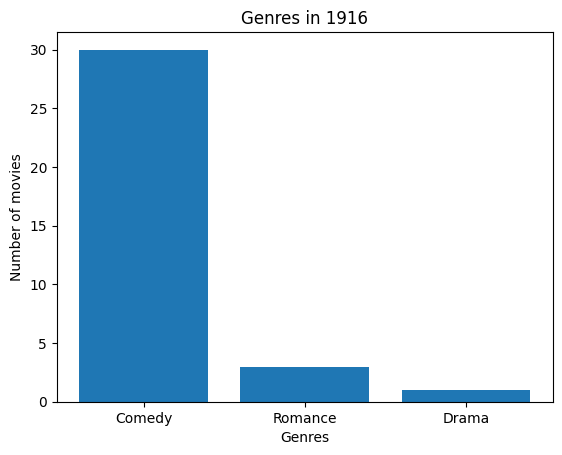

In [131]:
d1995 = movies[movies.startYear == 1916].groupby('tconst').first()['genres'].value_counts()
d1995
plt.bar(d1995.index, d1995.values)
plt.title('Genres in 1916')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
#plt.savefig('out/plots/1916.png')

In [172]:
movies[movies.primaryName == 'Aleksandr Baturin']

,nconst,actor,primaryName,actress,knownForTitles,director,tconst,titleType,originalTitle,startYear,Drama,Comedy,Romance,Thriller,genres,job
711,nm0061580,1,Aleksandr Baturin,0,tt0023359,0,tt0023359,movie,Prostoy sluchay,1930,0,0,1,0,Romance,actor


In [173]:
actors = []
for s, p, o in graph:
    if s == rdf.term.URIRef('http://imdb.org/actnm0061580'):
        if p == rdf.term.URIRef('http://imdb.org/ontology/collabs_with'):
            print(p,'nm' + o.split('nm')[1])
            actors.append(('nm' + o.split('nm')[1]))

http://imdb.org/ontology/collabs_with nm0233159


In [169]:
pavel_jovic = movies[movies.nconst.isin(actors)]['genres'].value_counts()

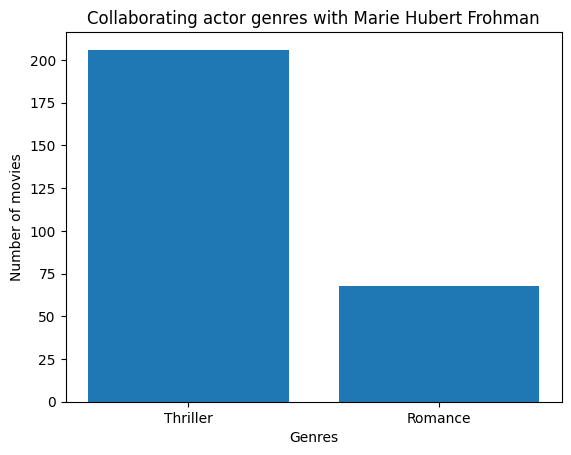

In [171]:
plt.bar(pavel_jovic.index, pavel_jovic.values)
plt.title('Collaborating actor genres with Marie Hubert Frohman')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.savefig('out/plots/collab_pavel.png')

In [26]:
actors = []
for s, p, o in graph:
    if s == rdf.term.URIRef('http://imdb.org/dirnm0201815'):
        if p == rdf.term.URIRef('http://imdb.org/ontology/collabs_with'):
            print(p,'nm' + o.split('nm')[1])
            actors.append(('nm' + o.split('nm')[1]))

http://imdb.org/ontology/collabs_with nm9133296
http://imdb.org/ontology/collabs_with nm1486102
http://imdb.org/ontology/collabs_with nm7629055
http://imdb.org/ontology/collabs_with nm7629053
http://imdb.org/ontology/collabs_with nm1778204
http://imdb.org/ontology/collabs_with nm0519329
http://imdb.org/ontology/collabs_with nm2514973
http://imdb.org/ontology/collabs_with nm7485614
http://imdb.org/ontology/collabs_with nm1306394
http://imdb.org/ontology/collabs_with nm0218876
http://imdb.org/ontology/collabs_with nm0051970
http://imdb.org/ontology/collabs_with nm5375672
http://imdb.org/ontology/collabs_with nm0154966
http://imdb.org/ontology/collabs_with nm1489034
http://imdb.org/ontology/collabs_with nm14830482
http://imdb.org/ontology/collabs_with nm9133295
http://imdb.org/ontology/collabs_with nm0488118
http://imdb.org/ontology/collabs_with nm3001286
http://imdb.org/ontology/collabs_with nm0479806
http://imdb.org/ontology/collabs_with nm14830472
http://imdb.org/ontology/collabs_with 

In [27]:
darwin = movies[movies.nconst.isin(actors)]['genres'].value_counts()

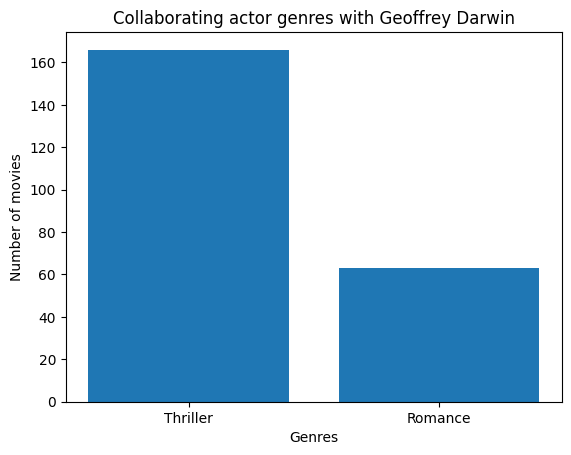

In [33]:
plt.bar(darwin.index, darwin.values)
plt.title('Collaborating actor genres with Geoffrey Darwin')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.savefig('out/plots/collab_darwin.png')